## Figure W4-5 - Zelda and Rpb1

#### Enter filenames:

In [1]:
figuredata_folder = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/figuredata/W4-zelda'
real_embedding_pkl = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__real-nuclei-set3-matched-20220630__20220619-plussims-20220616-realreal.pkl'
zld_sims_embedding_pkl = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__20220630-zld-nc13-70nm-library_GjGqzRyG__20220807-3xtrain-20220619-plussims-20220616-realreal.pkl'
zld_sims_embedding_pkl = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__20220813-zld-nc13-100nm-reallib_gdHIdOQQ__20220619-plussims-20220616-realreal.pkl'

#### Import libraries

In [2]:
# Import general libraries.
from importlib import reload
import flymovie as fm
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from importlib import reload
import umap
import scipy.ndimage as ndi
import skimage as ski
import matplotlib.image as mpimg

# Import functions specifically for this figure.
from flymovie.figures import make_df, embeddings_match_names, dist_to_center, extract_params_df, plot_hist, make_pairplot, make_pairplot_multdfs
%load_ext autoreload
%autoreload 2

#### Set up files, define subplotting functions.

In [3]:
embedding_real, names_real = fm.load_pickle(real_embedding_pkl)
embedding_zld_sims, names_zld_sims = fm.load_pickle(zld_sims_embedding_pkl)
zld_wt_real_vs_sim_png = os.path.join(figuredata_folder, 'zld_wt_real_vs_sim.png')
zld_mut_real_vs_sim_png = os.path.join(figuredata_folder, 'zld_mut_real_vs_sim.png')
zld_cterm_real_vs_sim_png = os.path.join(figuredata_folder, 'zld_cterm_real_vs_sim.png')
zld_wt_pairplot_png = os.path.join(figuredata_folder, 'zld_wt_pairplot.png')
zld_mut_pairplot_png = os.path.join(figuredata_folder, 'zld_mut_pairplot.png')
zld_wt_mut_pairplot_png = os.path.join(figuredata_folder, 'zld_mut_pairplot.png')
zld_wt_mut_all_pairplot_png = os.path.join(figuredata_folder, 'zld_mut_pairplot.png')
zld_cterm_pairplot_png = os.path.join(figuredata_folder, 'zld_cterm_pairplot.png')
outputfile_zld = os.path.join(figuredata_folder, 'fig_w4.png')

pattern_wt = 'zld-wt.*nc13-3_|zld-wt.*nc13-4_|zld-wt.*nc13-5_|zld-wt.*nc13-6_'
pattern_mut = 'zld-mut.*nc13-3_|zld-mut.*nc13-4_|zld-mut.*nc13-5_|zld-mut.*nc13-6_'


#### Make subplots, save.

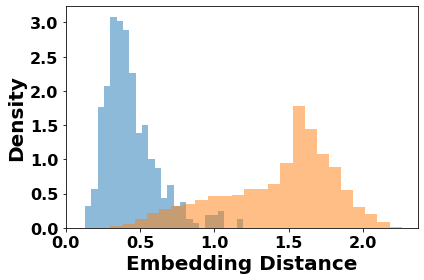

In [83]:
# Make sims vs. reals histogram for WT.
plot_hist(embedding_real, names_real, embedding_zld_sims, pattern=pattern_wt)
plt.savefig(zld_wt_real_vs_sim_png, dpi=300)

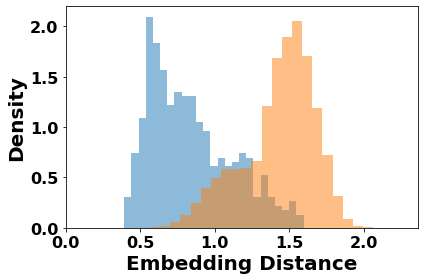

In [84]:
# Make sims vs. real histogram for mut.
plot_hist(embedding_real, names_real, embedding_zld_sims, pattern=pattern_mut)
plt.savefig(zld_mut_real_vs_sim_png, dpi=300)

In [ ]:
# Make sims vs. real histogram for cterm.
"""
pattern = 'cterm'

plot_hist(embedding_real, names_real, embedding_sims, pattern)
plt.savefig(mut_real_vs_sim_png, dpi=300)
"""

1434


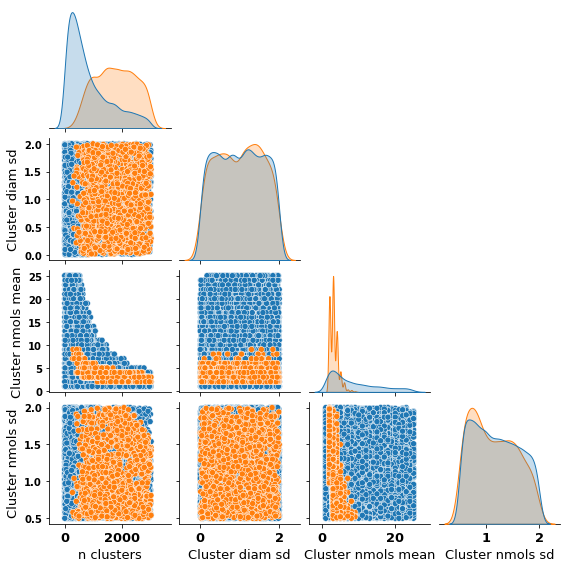

In [86]:
# Make pairplot.

df_zld_wt = make_pairplot(embedding_real, names_real, embedding_zld_sims, names_zld_sims, pattern=pattern_wt, cutoff=0.65, ncols=4, diag_kind='kde')
plt.savefig(zld_wt_pairplot_png, dpi=300)

579


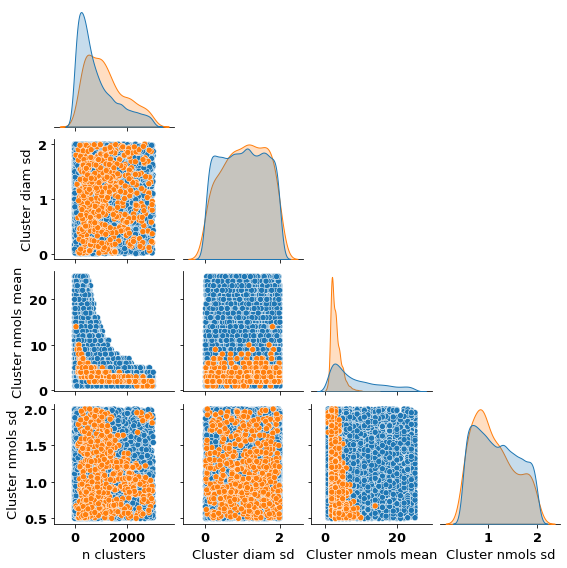

In [93]:
# Make pairplot.

df_zld_mut = make_pairplot(embedding_real, names_real, embedding_zld_sims, names_zld_sims, pattern=pattern_mut, cutoff=0.85, ncols=4)
plt.savefig(zld_mut_pairplot_png, dpi=300)


In [ ]:
make_pairplot_multdfs([df_zld_wt, df_zld_mut], ['wt', 'mut'], include_bg=False, palette='dark', alpha=1)
plt.savefig(zld_wt_mut_pairplot_png, dpi=300)

In [ ]:
make_pairplot_multdfs([df_zld_wt, df_zld_mut], ['wt', 'mut'], include_bg=True)
plt.savefig(zld_wt_mut_all_pairplot_png, dpi=300)

### Lay out figure.

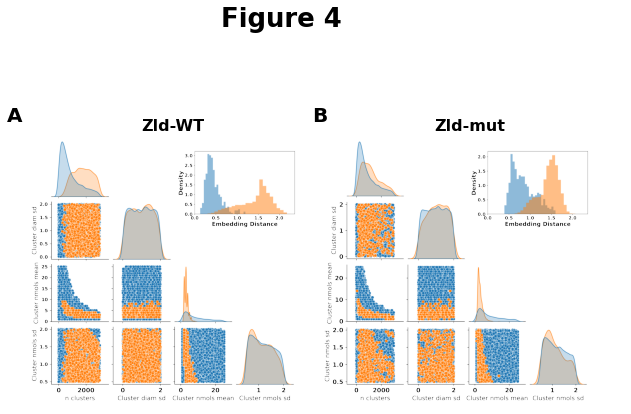

In [4]:
fig = plt.figure(constrained_layout=False, facecolor='1', figsize=(8.48,12))
plt.rcParams.update({'font.weight':'heavy'})

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -2

ax0 = fig.add_axes((0.05,0.50,0.5,0.5/1.41))
img = mpimg.imread(zld_wt_pairplot_png)
ax0.imshow(img, aspect='equal')
ax0.axis('off')

ax = fig.add_axes((0.295,0.70,0.20,0.20/1.41))
img = mpimg.imread(zld_wt_real_vs_sim_png)
ax.imshow(img, aspect='equal')
ax.axis('off')

ax = fig.add_axes((0.53,0.50,0.5,0.5/1.41))
img = mpimg.imread(zld_mut_pairplot_png)
ax.imshow(img, aspect='equal')
ax.axis('off')

ax = fig.add_axes((0.775,0.70,0.20,0.20/1.41))
img = mpimg.imread(zld_mut_real_vs_sim_png)
ax.imshow(img, aspect='equal')
ax.axis('off')

fig.text(0.37, 0.96,  'Figure 4', size=26)
fig.text(0.02, 0.85,  'A', size=20)
fig.text(0.52, 0.85,  'B', size=20)
fig.text(0.24, 0.84,  'Zld-WT', size=16)
fig.text(0.72, 0.84,  'Zld-mut', size=16)
#fig.text(0.63, 0.53,  'C', size=20)

fig.savefig(outputfile_zld,dpi=800)

In [ ]:
def make_hist_series(embedding_real, names_real, embedding_sims, names_sims, patterns, param, cutoff=np.inf):
    """."""
    print(len(patterns))
    fig, axes = plt.subplots(1, len(patterns), figsize=(8 * len(patterns), 12))
    dfs = []
    max = 0
    for i in range(len(patterns)):
        pattern = patterns[i]
        embedding_ref, _ = embeddings_match_names(embedding_real, names_real, pattern)
        df = extract_params_df(embedding_ref, embedding_sims, names_sims, cutoff=cutoff, ncols=7)
        print(df.shape)
        dfs.append(df)
        max_thisset = np.max(df[param])
        if max_thisset > max:
            max = max_thisset

    for i in range(len(patterns)):       
        axes[i].hist(dfs[i][param], bins=20, range=(0,max));

patterns = [
    'zld-wt.*nc13-1_','zld-wt.*nc13-2_','zld-wt.*nc13-3_','zld-wt.*nc13-4_','zld-wt.*nc13-5_', 
    'zld-wt.*nc13-6_','zld-wt.*nc13-7_'
]


#make_hist_series(embedding_real, names_real, embedding_sims, patterns=patterns, param='n clusters', cutoff=0.5)

In [ ]:
a = pd.DataFrame(np.random.random((10,2)))
a.loc[a[0] > 0]

In [ ]:
def make_scatter_series(embedding_real, names_real, embedding_sims, names_sims, patterns, params, cutoff=np.inf):
    """."""
    fig, axes = plt.subplots(1, len(patterns), figsize=(8 * len(patterns), 8))
    dfs = []
    for i in range(len(patterns)):
        pattern = patterns[i]
        embedding_ref, _ = embeddings_match_names(embedding_real, names_real, pattern)
        df = extract_params_df(embedding_ref, embedding_sims, names_sims, cutoff=cutoff, ncols=7)
        print(df.shape)
        dfs.append(df)

    df_all = df = extract_params_df(embedding_ref, embedding_sims, names_sims, cutoff=np.inf, ncols=7)
    df_all['sample'] = 'all'
    df_all = df_all.iloc[np.random.choice(np.arange(df_all.shape[0]), size=10_000, replace=False)]
    
    for i in range(len(patterns)):
        dfs[i]['sample'] = 'select'
        df_i  = pd.concat([df_all, dfs[i]], ignore_index=True)
        g = sns.scatterplot(data=df_i, x=params[0], y=params[1], hue='sample', ax=axes[i], legend=False, s=300, alpha=0.5);
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')



In [ ]:
patterns = [
    'zld-wt.*nc13-1_','zld-wt.*nc13-2_','zld-wt.*nc13-3_','zld-wt.*nc13-4_','zld-wt.*nc13-5_', 
    'zld-wt.*nc13-6_','zld-wt.*nc13-7_'
]

make_scatter_series(embedding_real, names_real, embedding_zld_sims, names_zld_sims, patterns=patterns, params=['n clusters', 'Cluster nmols sd'], cutoff=0.5)

In [ ]:
patterns = [
    'rpb1.*nc13-1_','rpb1.*nc13-2_','rpb1.*nc13-3_','rpb1.*nc13-4_','rpb1.*nc13-5_', 
    'rpb1.*nc13-6_','rpb1.*nc13-7_'
]

make_scatter_series(embedding_real, names_real, embedding_rpb1_sims, names_rpb1_sims, patterns=patterns, params=['n clusters', 'Cluster nmols mean'], cutoff=0.4)

In [ ]:
# Make pairplot.
pattern = 'rpb.*nc13-3_|rpb.*nc13-4_|rpb.*nc13-5_|rpb.*nc13-6_'
make_pairplot(embedding_real, names_real, embedding_rpb1_sims, names_rpb1_sims, pattern, cutoff=0.4, ncols=4)
#plt.savefig(zld_mut_pairplot_png, dpi=300)

In [ ]:
patterns = [
    'rpb1.*nc13-1_','rpb1.*nc13-2_','rpb1.*nc13-3_','rpb1.*nc13-4_','rpb1.*nc13-5_', 
    'rpb1.*nc13-6_','rpb1.*nc13-7_'
]

patterns = [
    'rpb1.*nc13-3_'
]

make_scatter_series(embedding_real, names_real, embedding_sims, patterns=patterns, params=['n clusters', 'Cluster nmols sd'], cutoff=np.inf)

In [ ]:
def make_hist_series(embedding_real, names_real, embedding_sims, names_sims, patterns, param, cutoff=np.inf):
    """."""
    print(len(patterns))
    fig, axes = plt.subplots(1, len(patterns), figsize=(8 * len(patterns), 12))
    dfs = []
    max = 0
    for i in range(len(patterns)):
        pattern = patterns[i]
        embedding_ref, _ = embeddings_match_names(embedding_real, names_real, pattern)
        df = extract_params_df(embedding_ref, embedding_sims, names_sims, cutoff=cutoff, ncols=7)
        print(df.shape)
        dfs.append(df)
        max_thisset = np.max(df[param])
        if max_thisset > max:
            max = max_thisset

    for i in range(len(patterns)):       
        #axes[i].hist(dfs[i][param], bins=20, range=(0,max), density=True);
        sns.kdeplot(dfs[i][param], ax=axes[i], shade='fill', clip=(0.0, max))

patterns = [
    'rpb1.*nc13-1_','rpb1.*nc13-2_','rpb1.*nc13-3_','rpb1.*nc13-4_','rpb1.*nc13-5_', 
    'rpb1.*nc13-6_','rpb1.*nc13-7_'
]

make_hist_series(embedding_real, names_real, embedding_rpb1_sims, names_rpb1_sims, patterns=patterns, param='n clusters', cutoff=0.4)